In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
class ForthAgentModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5,32,9,1,3) # 15 x 15 x 32
        self.linear1 = nn.Linear(7200,7200)
        self.linear2 = nn.Linear(7200,1024)
        self.linear3= nn.Linear(1024,6)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.reshape(-1,7200)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
import torch.optim as optim
model = ForthAgentModel()
print(sum(p.numel() for p in model.parameters()))
device = "cuda"
model.to(device)
#print(list(model.parameters()))
#feat = torch.rand((1,5,17,17),dtype=torch.float32,device=device)

59240166


ForthAgentModel(
  (conv1): Conv2d(5, 32, kernel_size=(9, 9), stride=(1, 1), padding=(3, 3))
  (linear1): Linear(in_features=7200, out_features=7200, bias=True)
  (linear2): Linear(in_features=7200, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=6, bias=True)
)

In [10]:
%%timeit
res = model.forward(feat)
#torch.cuda.synchronize()
#print(res)


8.61 ms ± 356 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


cuda:
res = model.forward(torch.rand((100,4,17,17),dtype=torch.float32,device=device))
1.28 ms ± 14 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1000:
9.05 ms ± 39.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10k:
87.7 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
cpu:
27.5 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1000:
235 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10k:
2.39 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [4]:
torch.save(model.state_dict(),"model.pth")

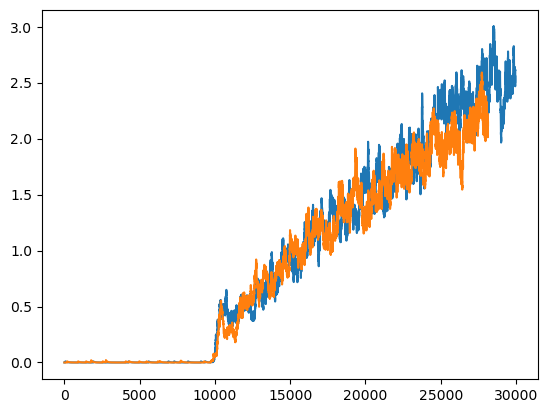

In [4]:
# analyze the loss
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from typing import List
import matplotlib.pyplot as plt
import numpy as np

def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

def plot(score_path):
    loss = np.load(score_path)
    plt.figure()
    #plt.yscale("log")
    plt.plot(smooth(loss,0.99))
    #plt.show()

path = "2024.09.29-01.09.20_score_history.npy"
plt.plot(smooth(np.load(path),0.99))
path = "2024.09.29-02.36.45_score_history.npy"
plt.plot(smooth(np.load(path),0.99))